In [1]:
import os
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
from DataPreparation import *

# Paths
img_dir = 'Datasets/Chestxray/Test_images'
output_dir = 'Datasets/Chestxray/Output'
img_name = 'CHNCXR_0062_0.png'

df, img = load_image_and_samples(img_dir, output_dir, img_name)
node_groups = df.groupby('Node')

## Corruption

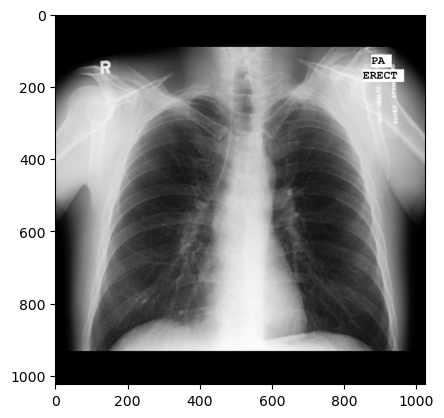

In [ ]:
np.random.seed(4)

img_name = 'MCUCXR_0022_0.png'
df, img = load_image_and_samples(img_dir, output_dir, img_name)
file_name = img_name.strip('.png')
all_landmarks = extract_landmarks(file_name, split=False)

landmarks_H = sample_landmarks(all_landmarks, 'H', n_samples=0)
landmarks_RL = sample_landmarks(all_landmarks, 'RL', n_samples=0)
landmarks_LL = sample_landmarks(all_landmarks, 'LL', n_samples=3)

landmarks = np.vstack([landmarks_H, landmarks_RL, landmarks_LL[1]]).astype(int)

corrupted_image = apply_blur(
    image=img,
    landmarks=landmarks,
    size=120,
    severity=2
)

plt.imshow(corrupted_image, cmap='gray')

In [ ]:
random.seed(42)
process_images(img_dir, os.path.join('Corrupted', 'noise'), gaussian_noise, list(range(0, 20)))

random.seed(1)
process_images(img_dir, os.path.join('Corrupted', 'blurring'), gaussian_blur, list(range(0, 50, 2)))

In [ ]:
np.random.seed(51)
selected_images = sample_images(img_dir, num_samples=15)
occlusion_dir = os.path.join(img_dir, 'Corrupted', 'occlusion')
os.makedirs(occlusion_dir, exist_ok=True)

for img_name in selected_images:
    df, img = load_image_and_samples(img_dir, output_dir, img_name)
    file_name = img_name.strip('.png')
    all_landmarks = extract_landmarks(file_name)

    landmarks_H = sample_landmarks(all_landmarks, 'H', n_samples=0)
    landmarks_RL = sample_landmarks(all_landmarks, 'RL', n_samples=1)
    landmarks_LL = sample_landmarks(all_landmarks, 'LL', n_samples=0)

    landmarks = np.vstack([landmarks_H, landmarks_RL, landmarks_LL]).astype(int)

    corrupted_image = apply_occlusion(
        image=img,
        landmarks=landmarks,
        size=150
    )

    output_path = os.path.join(occlusion_dir, f"{file_name}_1.png")
    cv2.imwrite(output_path, corrupted_image)

## Uncertainty map

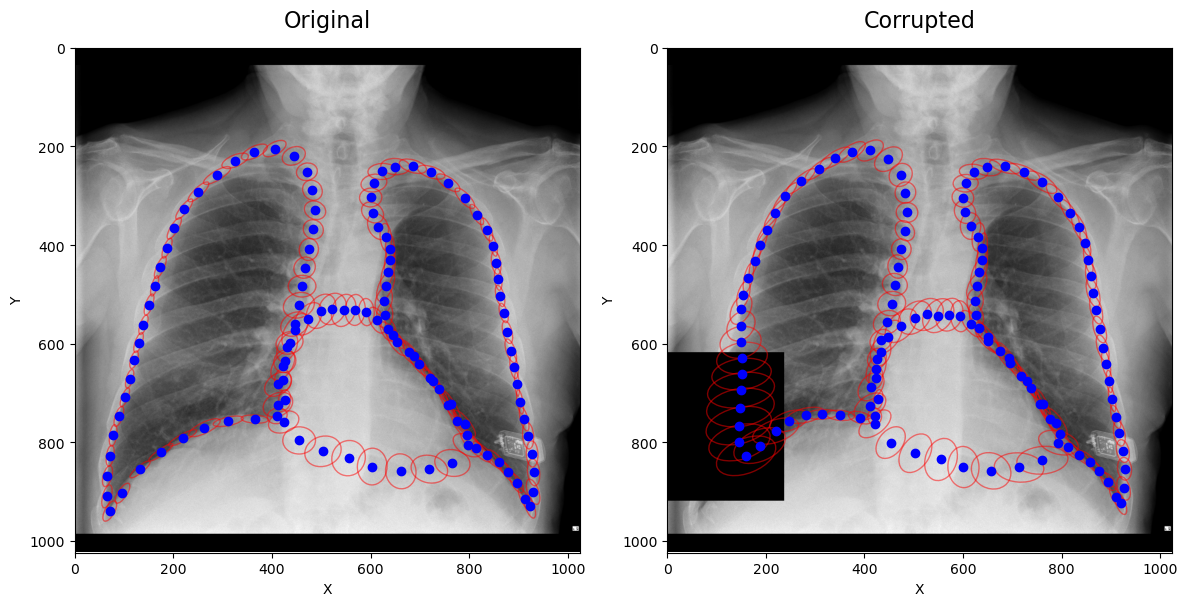

In [ ]:
img_dir_orig = 'Datasets/Chestxray/Test_images'
output_dir_orig = 'Datasets/Chestxray/Output'
img_dir_corr = 'Datasets/Chestxray/Test_images/Corrupted/occlusion'
output_dir_corr = 'Datasets/Chestxray/Output/Corrupted/occlusion'

img_name_orig = '121369866312829737404259612004787672904_od40ao.png'
img_name_corr = f"{img_name_orig.strip('.png')}_1.png"

df_orig, img_orig = load_image_and_samples(img_dir_orig, output_dir_orig, img_name_orig)
df_corr, img_corr = load_image_and_samples(img_dir_corr, output_dir_corr, img_name_corr)

fig, axes = plot_comparison(
    df_orig, img_orig, df_corr, img_corr,
    plot_fn=plot_mean_with_uncertainty,
    use_error_bars=False,
    scale_factor=8
)

/tmp/ipykernel_215780/3060170091.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


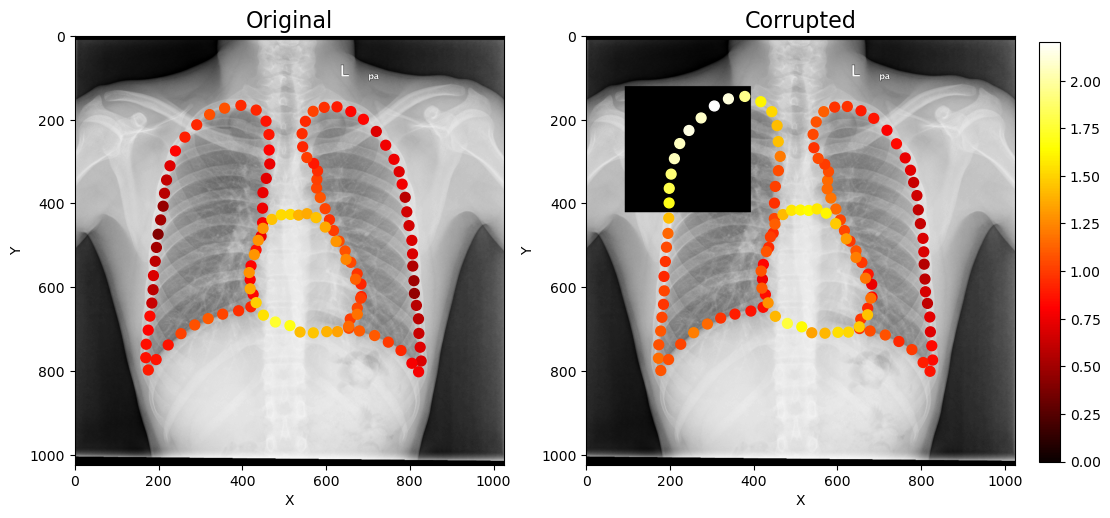

In [24]:
img_name_orig = 'CHNCXR_0304_0.png'
img_name_corr = f"{img_name_orig.strip('.png')}_1.png"

df_orig, img_orig = load_image_and_samples(img_dir_orig, output_dir_orig, img_name_orig)
df_corr, img_corr = load_image_and_samples(img_dir_corr, output_dir_corr, img_name_corr)

vmax = compute_global_vmax(df_orig, df_corr)

fig, axes = plot_comparison(
    df_orig, img_orig, df_corr, img_corr,
    plot_fn=plot_mean_with_color_gradient,
    show_global_bar=True,
    vmax=vmax,
    show_bar=False
)

/tmp/ipykernel_215780/3060170091.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


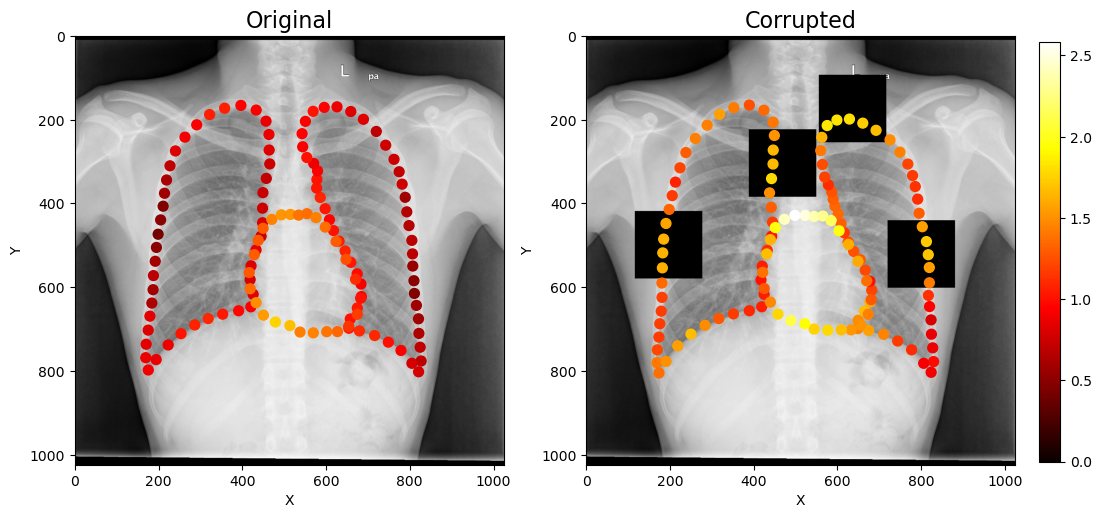

In [25]:
img_name_orig = 'CHNCXR_0304_0.png'
img_name_corr = f"{img_name_orig.strip('.png')}_4.png"

df_orig, img_orig = load_image_and_samples(img_dir_orig, output_dir_orig, img_name_orig)
df_corr, img_corr = load_image_and_samples(img_dir_corr, output_dir_corr, img_name_corr)

fig, axes = plot_comparison(
    df_orig, img_orig, df_corr, img_corr,
    plot_fn=plot_mean_with_color_gradient,
    show_global_bar=True,
    vmax=compute_global_vmax(df_orig, df_corr),
    show_bar=False
)

/tmp/ipykernel_215780/3060170091.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


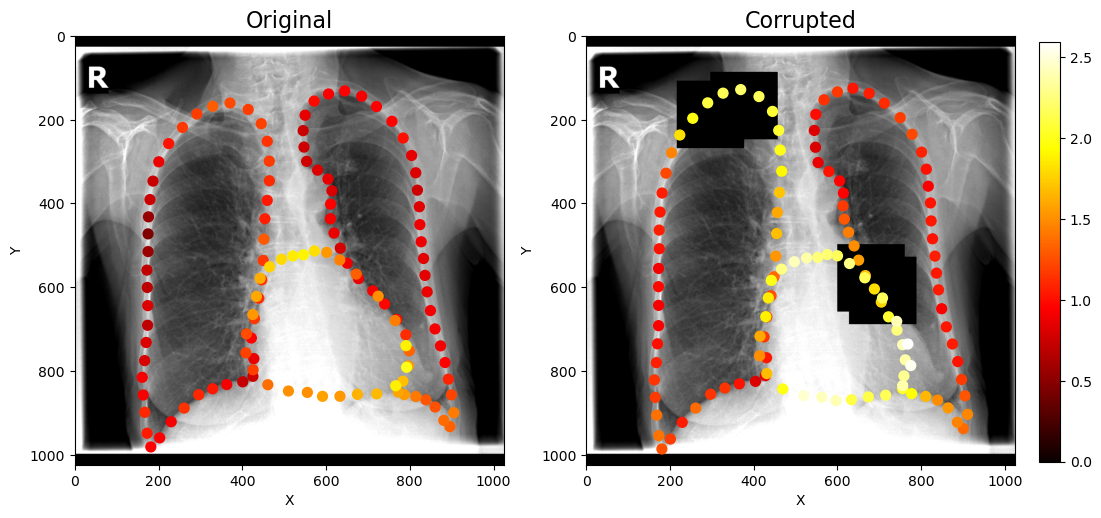

In [28]:
img_name_orig = '245895219126534788779109786698958326807_1a9ait.png'
img_name_corr = f"{img_name_orig.strip('.png')}_4.png"

df_orig, img_orig = load_image_and_samples(img_dir_orig, output_dir_orig, img_name_orig)
df_corr, img_corr = load_image_and_samples(img_dir_corr, output_dir_corr, img_name_corr)

fig, axes = plot_comparison(
    df_orig, img_orig, df_corr, img_corr,
    plot_fn=plot_mean_with_color_gradient,
    show_global_bar=True,
    vmax=compute_global_vmax(df_orig, df_corr),
    show_bar=False
)

/tmp/ipykernel_215780/3060170091.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


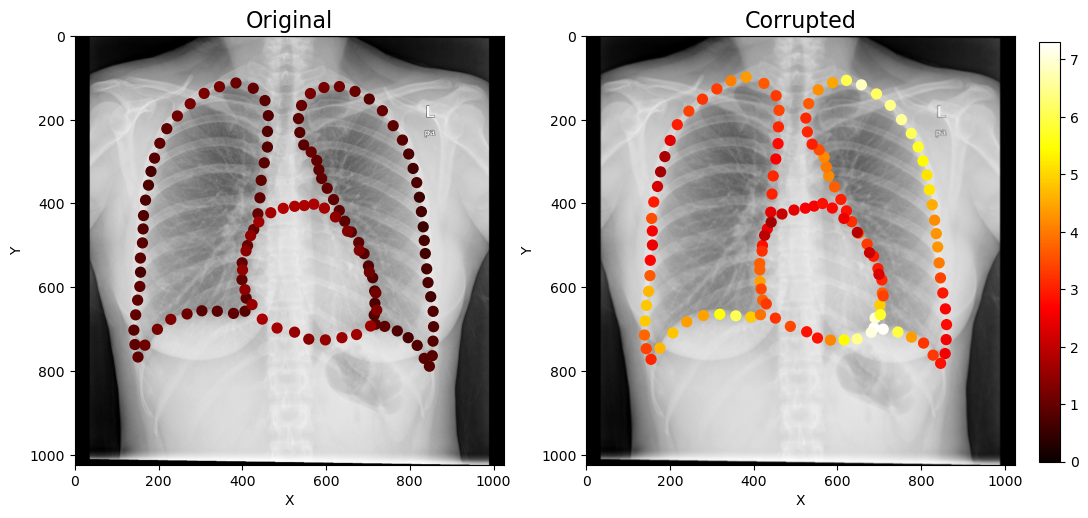

In [29]:
img_dir_corr = 'Datasets/Chestxray/Test_images/Corrupted/blurring'
output_dir_corr = 'Datasets/Chestxray/Output/Corrupted/blurring'
img_name_orig = 'CHNCXR_0084_0.png'
img_name_corr = f"{img_name_orig.strip('.png')}_2.png"

df_orig, img_orig = load_image_and_samples(img_dir_orig, output_dir_orig, img_name_orig)
df_corr, img_corr = load_image_and_samples(img_dir_corr, output_dir_corr, img_name_corr)

fig, axes = plot_comparison(
    df_orig, img_orig, df_corr, img_corr,
    plot_fn=plot_mean_with_color_gradient,
    show_global_bar=True,
    vmax=compute_global_vmax(df_orig, df_corr),
    show_bar=False
)

## Noise vs uncertainty

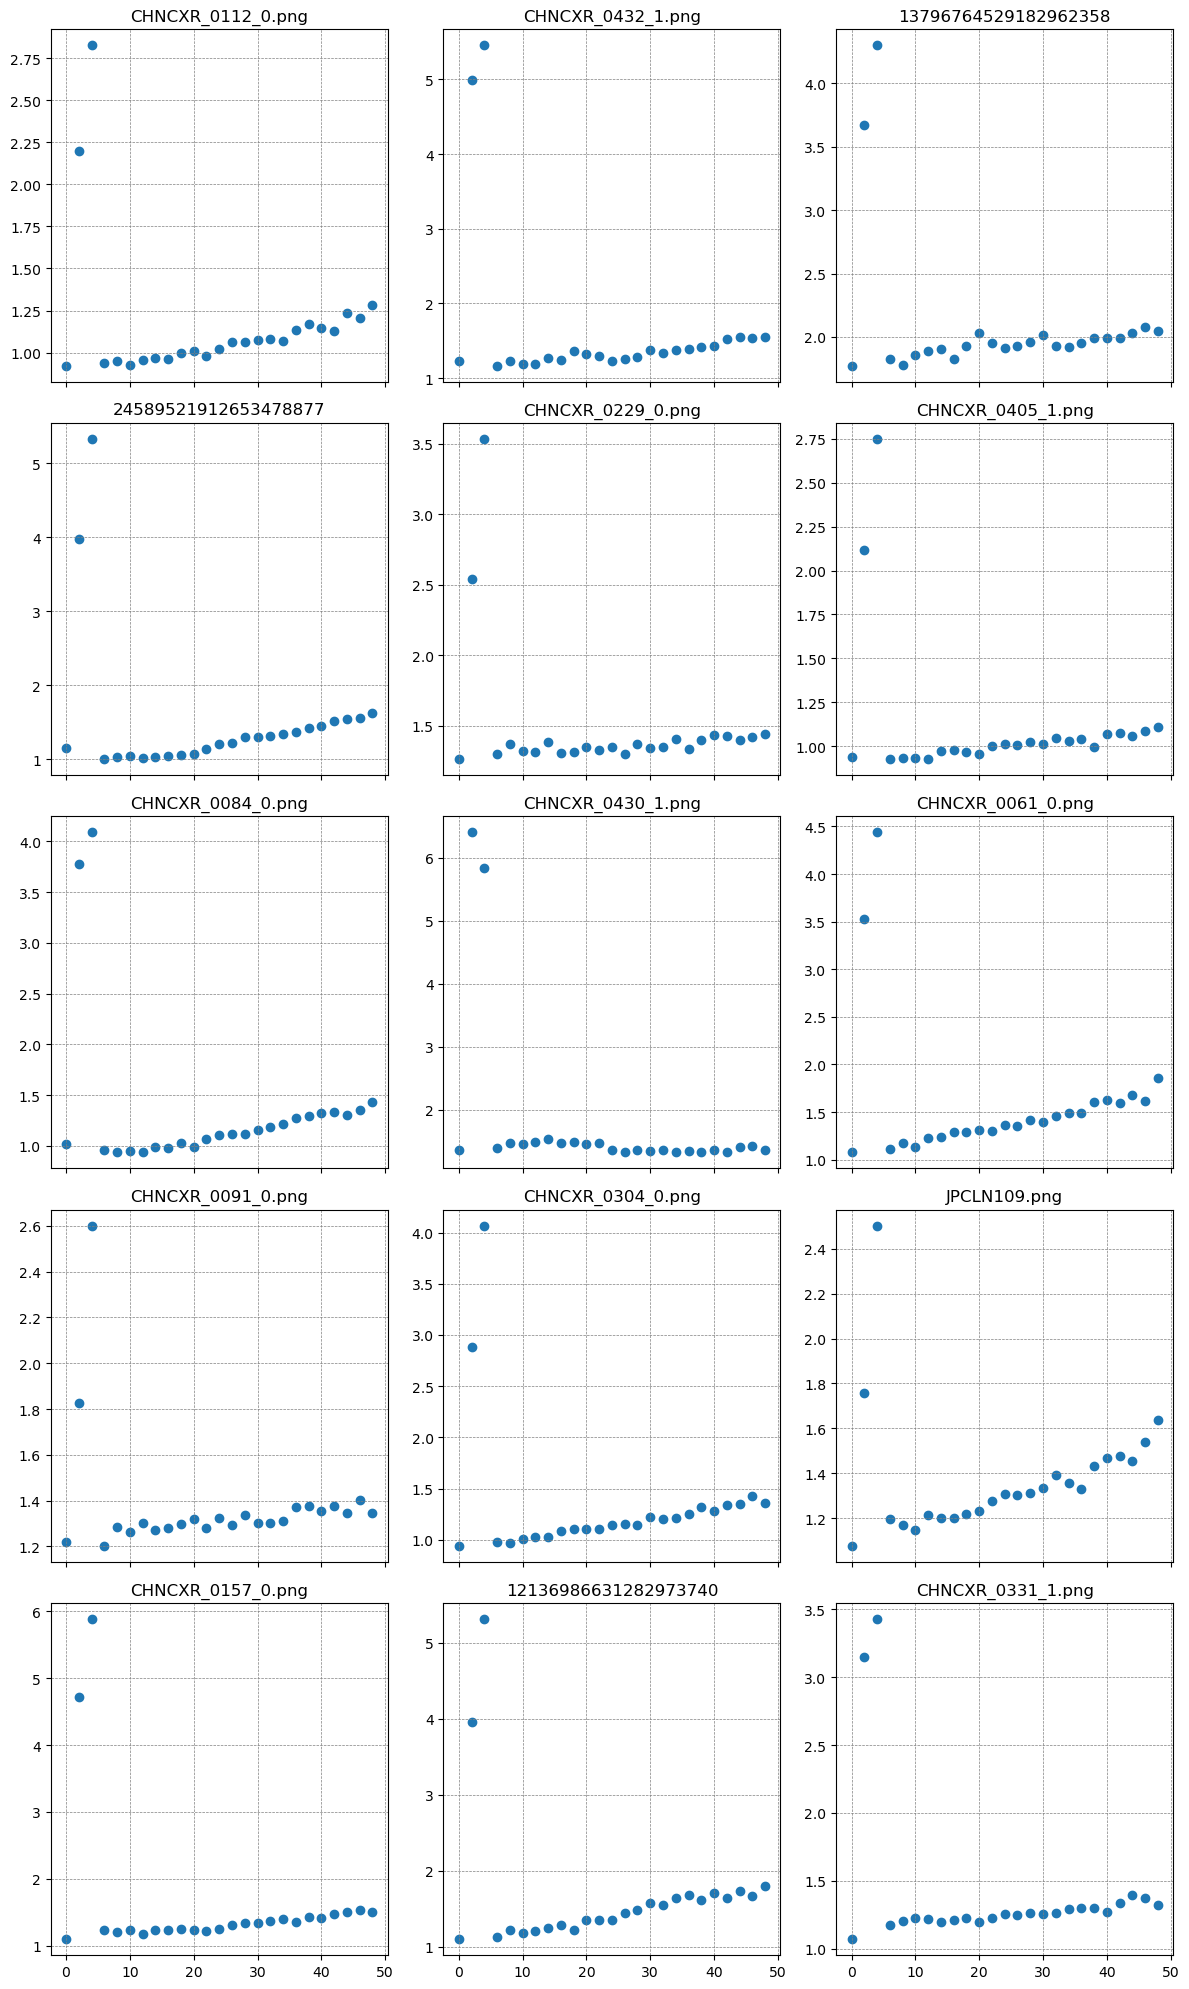

In [3]:
def process_and_store_sigma(subdir, img_dir, output_dir):
    """Processes corrupted images and returns a sigma dictionary."""
    img_dir_path = os.path.join(img_dir, 'Corrupted', subdir)
    output_dir_path = os.path.join(output_dir, 'Corrupted', subdir)
    
    selected_images = {
        "_".join(file.split('_')[:-1]) + ".png"
        for file in os.listdir(img_dir_path)
    }
    
    return process_corr_images(img_dir_path, output_dir_path, selected_images)

sigma_dict_noise = process_and_store_sigma('noise', img_dir, output_dir)
sigma_dict_blur = process_and_store_sigma('blurring', img_dir, output_dir)

# Plot results
plot_sigmas_mean(sigma_dict_blur)

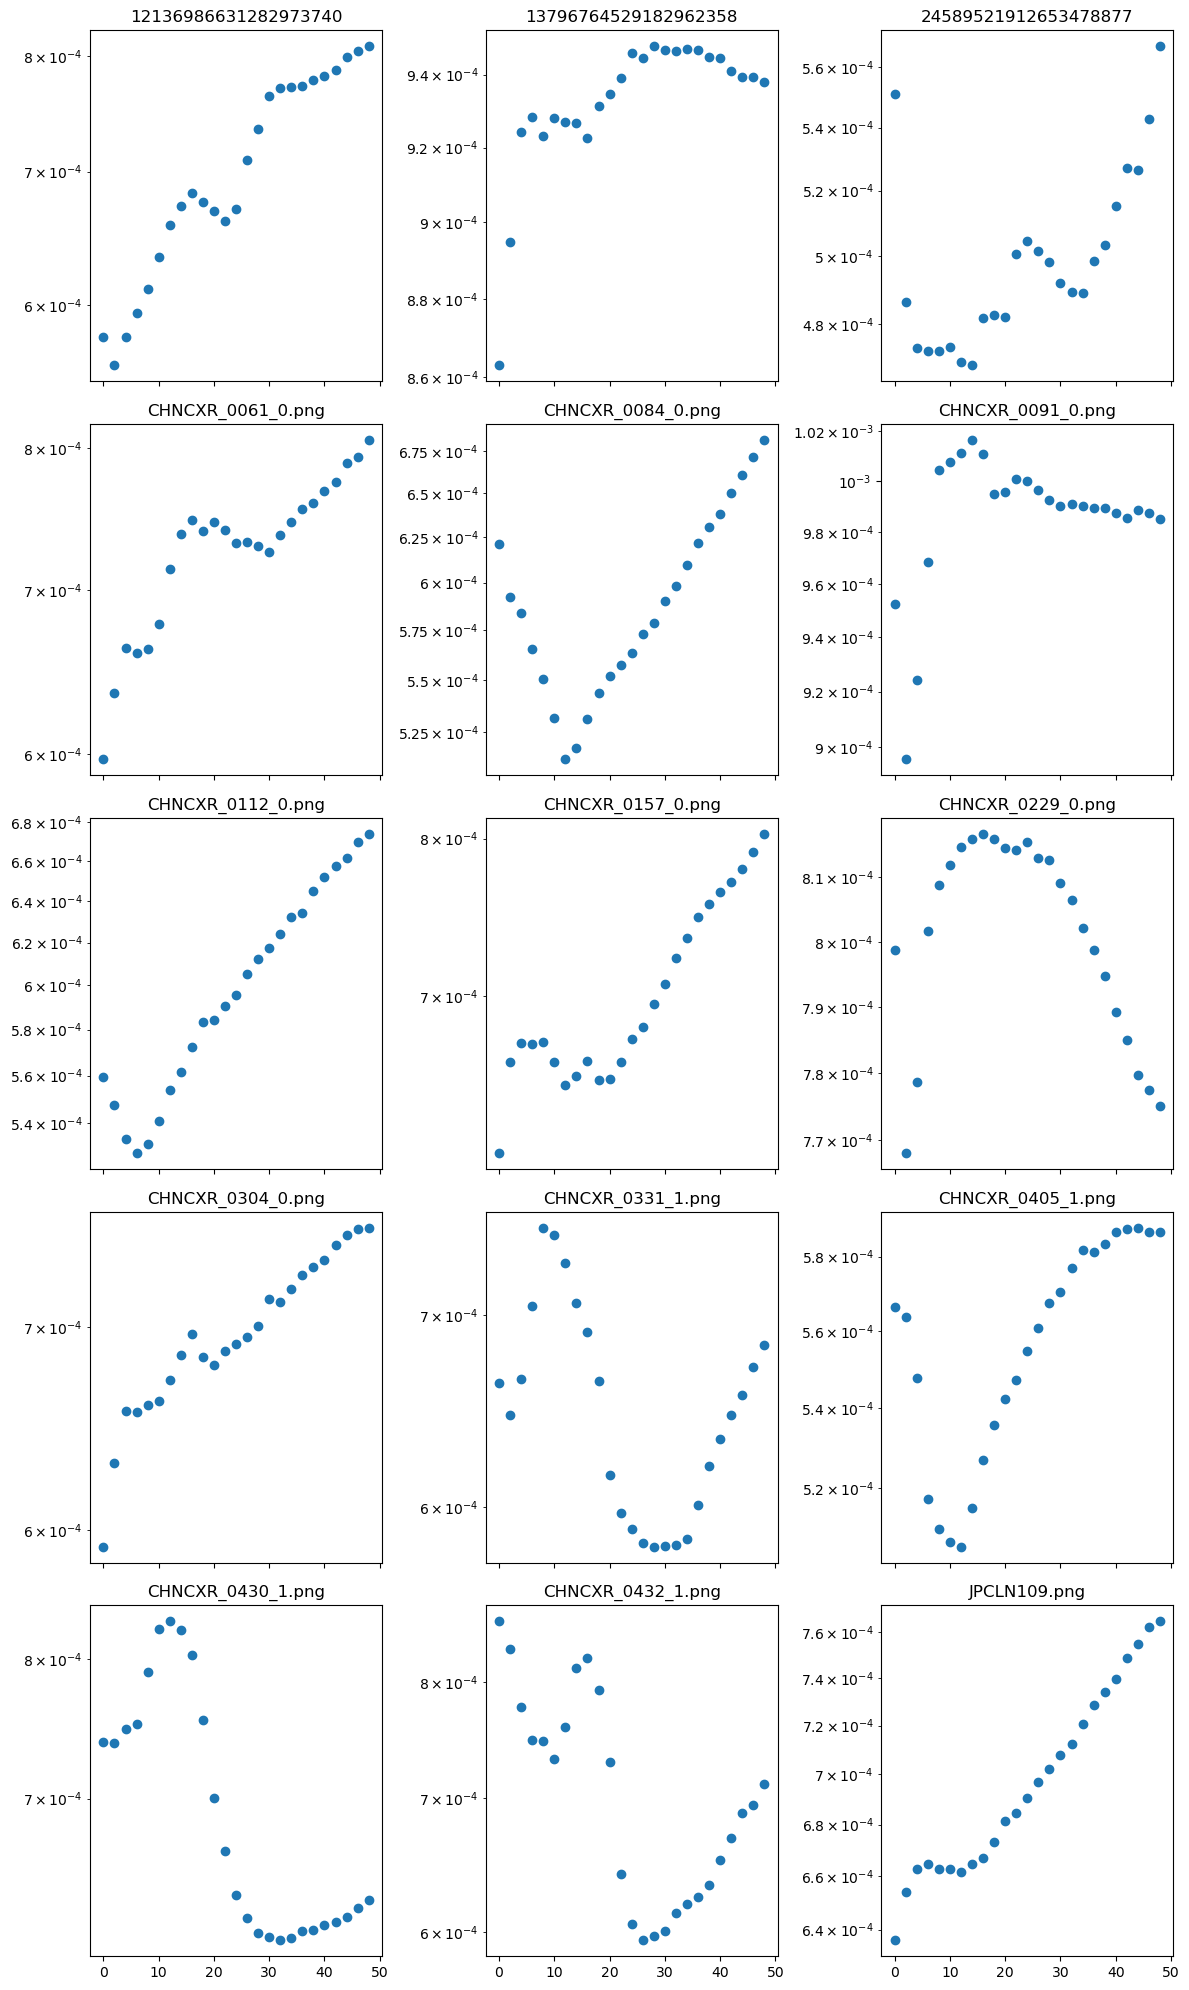

In [32]:
file_path = 'Datasets/Chestxray/output_sigmas_blurring.txt'
latent_sigma_dict = read_sigma_file(file_path)
plot_sigmas_mean(latent_sigma_dict, yscale='log', grid=False)

## Error vs uncertainty

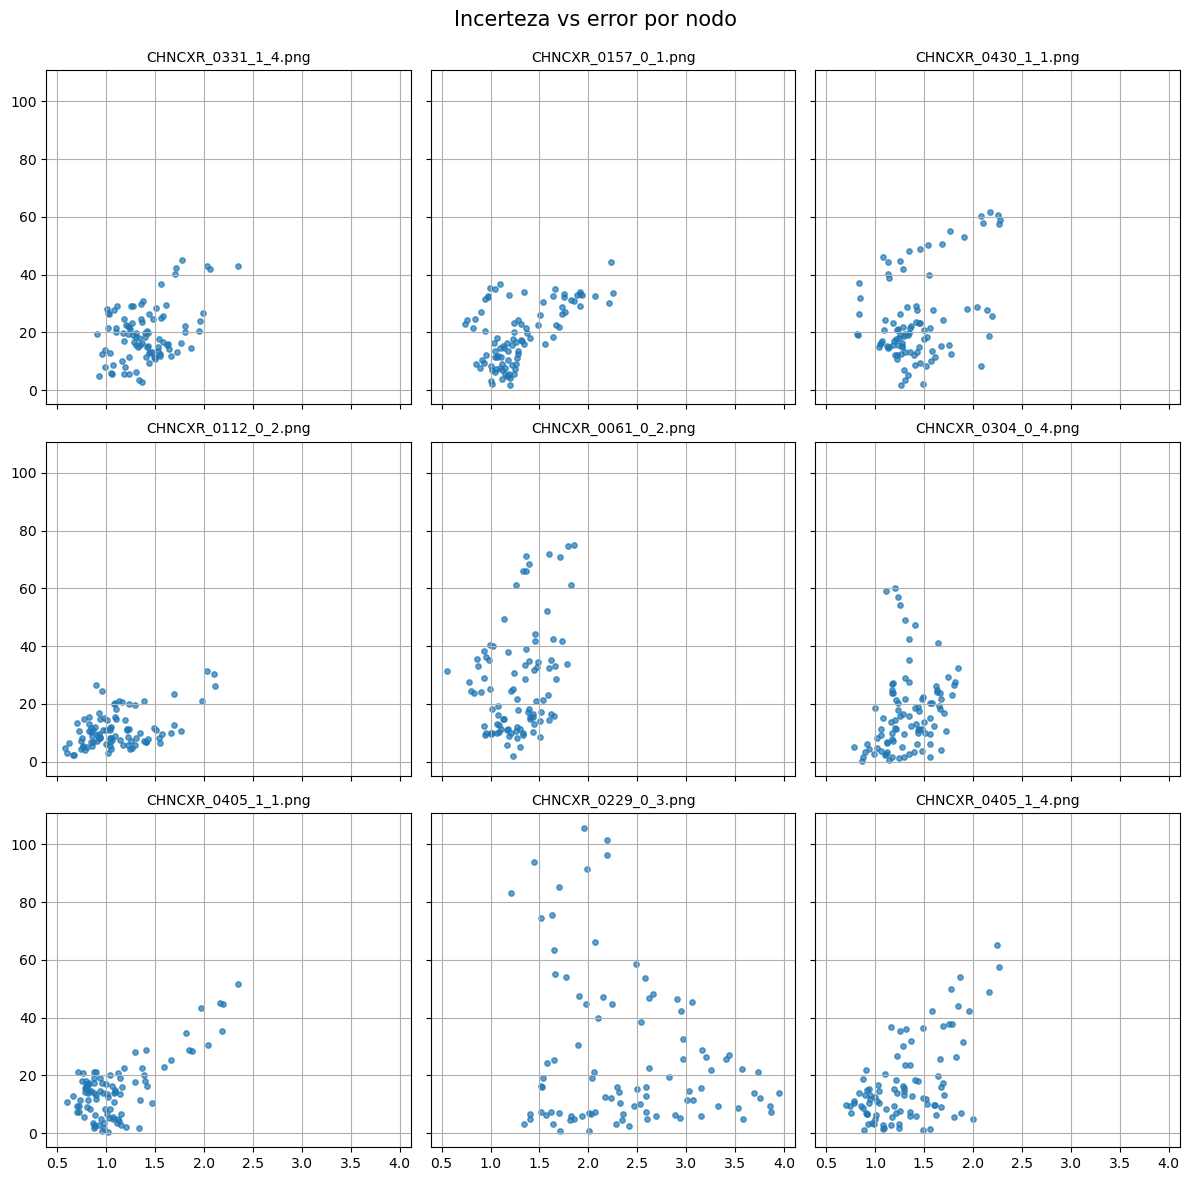

In [35]:
img_dir_occ = os.path.join(img_dir, 'Corrupted', 'occlusion')
output_dir_occ = os.path.join(output_dir, 'Corrupted', 'occlusion')
files = os.listdir(img_dir_occ)

img_dict_occ, img_dict_orig = {}, {}

for file in files:
    error, sigmas = get_error(img_dir_occ, output_dir_occ, file)
    img_dict_occ[file] = (error, sigmas)

all_err = []
all_sigmas = []

for error, sigmas in img_dict_occ.values():
    all_err.extend(error)       
    all_sigmas.extend(sigmas)

fig, axes = plt.subplots(3, 3, figsize=(12, 12), sharex=True, sharey=True)
axes = axes.flatten()

for i, key in enumerate(list(img_dict_occ.keys())[:9]):
    error, sigmas = img_dict_occ[key]  
    
    ax = axes[i]  
    ax.scatter(sigmas, error, s=15, alpha=0.7)  
    ax.set_title(key, fontsize=10)
    ax.grid(True)

plt.tight_layout()
plt.suptitle('Incerteza vs error por nodo', fontsize=15)
plt.subplots_adjust(top=0.93) 
plt.show()

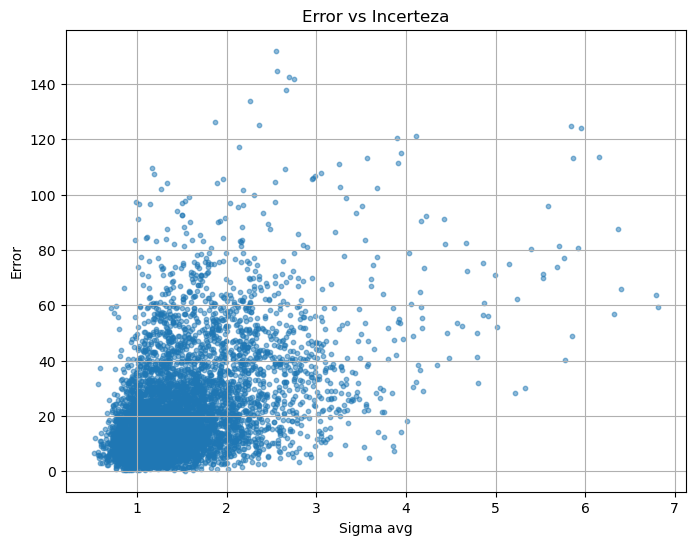

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(all_sigmas, all_err, alpha=0.5, s=10) 
plt.xlabel("Sigma avg")
plt.ylabel("Error")
plt.title("Error vs Incerteza")
plt.grid(True)
plt.show()

## Global